In [5]:
import torch
import numpy as np
%matplotlib inline


# 텐서(Tensor)

텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조입니다.
PyTorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)합니다.

텐서는 GPU나 다른 하드웨어 가속기에서 실행할 수 있다는 점만 제외하면 [NumPy](https://numpy.org) 의 ndarray와 유사합니다.


텐서는 또한 자동 미분(automatic differentiation, 즉 AutoGrad)에 최적화되어 있습니다.


ndarray에 익숙하다면 Tensor API를 바로 사용할 수 있을 것입니다. 아니라면, 아래 내용을 함께 보시죠!


## 텐서(tensor) 초기화

텐서는 여러가지 방법으로 초기화할 수 있습니다.

**데이터로부터 직접(directly) 생성하기**

데이터로부터 직접 텐서를 생성할 수 있습니다. 데이터의 자료형(data type)은 자동으로 유추합니다.



In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

**NumPy 배열로부터 생성하기**

텐서는 NumPy 배열로 생성할 수 있습니다.



In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

**다른 텐서로부터 생성하기:**

명시적으로 재정의(override)하지 않는다면, 인자로 주어진 텐서의 속성(모양(shape), 자료형(datatype))을 유지합니다.



In [ ]:
x_ones = torch.ones_like(x_data) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) #x_data, dtype=torch.float x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3933, 0.9639],
        [0.5856, 0.3925]]) 



**무작위(random) 또는 상수(constant) 값을 사용하기:**

``shape`` 은 텐서의 차원(dimension)을 나타내는 튜플(tuple)로, 아래 함수들에서는 출력 텐서의 차원을 결정합니다.



In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7128, 0.5919, 0.4444],
        [0.1492, 0.4843, 0.4244]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


--------------




## 텐서의 속성(Attribute)

텐서의 속성은 텐서의 모양(shape), 자료형(datatype) 및 어느 장치에 저장되는지를 나타냅니다.



In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




## 텐서 연산(Operation)

전치(transposing), 인덱싱(indexing), 슬라이싱(slicing), 수학 계산, 선형 대수,
랜덤 샘플링 등, 100가지 이상의 텐서 연산들을
[여기](https://pytorch.org/docs/stable/torch.html) 에서 확인할 수 있습니다.

각 연산들은 (일반적으로 CPU보다 빠른) GPU에서 실행할 수 있습니다. Colab을 사용한다면,
런타임 > 런타임 유형 변경 에서 GPU를 할당할 수 있습니다.

기본적으로 텐서는 CPU에 생성됩니다. ``.to`` 메소드를 사용하면 (GPU가 사용 가능한 지를 확인한 뒤)
GPU로 텐서를 명시적으로 이동할 수 있습니다. 장치들 간에 큰 텐서들을 복사하는 것은 시간과 메모리 측면에서 비용이
많이든다는 것을 기억하세요!



In [4]:
# GPU가 존재하면 텐서를 이동합니다
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

print(tensor.device)

NameError: name 'tensor' is not defined

목록에서 몇몇 연산들을 시도해보세요.



**NumPy식의 표준 인덱싱과 슬라이싱:**



In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:,0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**텐서 합치기** ``torch.cat`` 을 사용하여 주어진 차원에 따라 일련의 텐서를 연결할 수 있습니다.


In [ ]:
tensor = torch.ones(3, 4)
print(tensor.shape)
t1 = torch.cat((tensor, tensor,tensor), dim=1)
print(t1.shape)

print(tensor)
print(t1)

torch.Size([3, 4])
torch.Size([3, 12])
torch.Size([3, 12])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


**텐서 차원 조작하기** ``.permute()``, ``.reshape()``,``.flatten()`` 등을 사용하여 주어진 차원에 따라 일련의 텐서를 조작 할 수 있습니다.







In [ ]:
tensor = torch.ones(2, 3, 4)
tensor_per = tensor.permute(0,2,1)
print(tensor_per.shape)
tensor_flatten = tensor.flatten(0,2)
print(tensor_flatten.shape)
tensor_reshape = tensor.reshape(-1,12)
print(tensor_reshape.shape)

torch.Size([2, 4, 3])
torch.Size([24])
torch.Size([2, 12])


**산술 연산(Arithmetic operations)**



In [11]:
# 두 텐서 간의 행렬 곱(matrix multiplication)을 계산합니다. y1, y2은 모두 같은 값을 갖습니다.
# ``tensor.T`` 는 텐서의 전치(transpose)를 반환합니다.
tensor = torch.ones(4, 4)

y1 = tensor@tensor
y2 = tensor.matmul(tensor)

print(y1, y2)
# 요소별 곱(element-wise product)을 계산합니다.
z3 = tensor* tensor
print(z3)

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]]) tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


**단일-요소(single-element) 텐서** 텐서의 모든 값을 하나로 집계(aggregate)하여

1.   항목 추가
2.   항목 추가

요소가 하나인 텐서의 경우,
``item()`` 을 사용하여 Python 숫자 값으로 변환할 수 있습니다:



In [16]:
agg = tensor.sum(dim=1)

agg_item=0
for scalar in agg:
    agg_item += scalar.item()
print(agg_item, type(agg_item))

# dimension 추가


16.0 <class 'float'>


--------------




# Autograd

## ``torch.autograd`` 를 사용한 자동 미분

모델을 학습할 때 가장 자주 사용되는 알고리즘은 **역전파(Backpropagation)** 입니다. 이 알고리즘에서,
파라미터(모델 Weight)는 주어진 매개변수에 대한 Loss function의 **Gradient** 에
따라 조정됩니다.

이러한 변화도를 계산하기 위해 PyTorch에는 ``torch.autograd`` 라고 불리는 자동 미분 엔진이
내장되어 있습니다. 이는 모든 계산 그래프에 대한 Gradient의 자동 계산을 지원합니다.
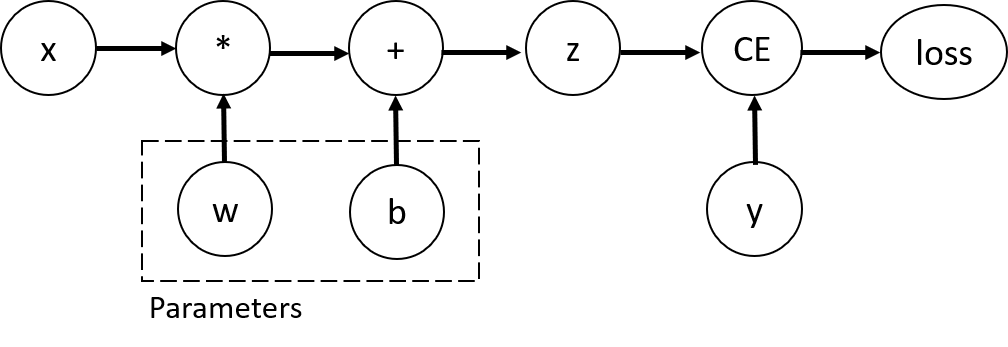

In [ ]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = ((z - y) ** 2).mean()
print(x)
print(y)
print(w)
print(b)
print(z)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0.])
tensor([[ 5.1717e-01, -2.4749e-01,  6.4992e-01],
        [ 6.9970e-01,  9.7103e-01,  1.0585e+00],
        [-1.1148e+00,  1.0839e+00, -4.7422e-02],
        [-2.1493e+00,  2.1176e-01, -1.5232e+00],
        [-1.0356e+00, -1.1350e-04,  1.5591e-01]], requires_grad=True)
tensor([ 0.3969, -1.4743,  1.8126], requires_grad=True)
tensor([-2.6859,  0.5448,  2.1063], grad_fn=<AddBackward0>)


In [ ]:
loss.backward()
print(x.grad)
print(w.grad)

None
tensor([[-1.7906,  0.3632,  1.4042],
        [-1.7906,  0.3632,  1.4042],
        [-1.7906,  0.3632,  1.4042],
        [-1.7906,  0.3632,  1.4042],
        [-1.7906,  0.3632,  1.4042]])


모든 텐서는 ``requires_grad=False``로 설정되며, ``x``는 따로 이를 설정해두지 않았기 때문에, ``loss.backward()`` 이후에도 `x.grad`가 생성되지 않습니다.  ``requires_grad`` 의 값은 텐서를 생성할 때 설정하거나, 나중에``x.requires_grad_(True)`` 메소드를 사용하여 나중에 설정할 수도 있습니다.


In [ ]:
x = torch.ones(5, requires_grad = True)  # input tensor, Requires_grad
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = ((z - y) ** 2).mean()

In [ ]:
loss.backward()
print(x.grad)

tensor([ 1.6149,  1.2117, -1.0527, -0.1450,  0.0159])


Note :
연산 그래프를 구성하기 위해 텐서에 적용하는 함수는 사실 ``Function`` 클래스의 객체입니다.
이 객체는 *순전파* 방향으로 함수를 계산하는 방법과, *역방향 전파* 단계에서 도함수(derivative)를
계산하는 방법을 알고 있습니다. 역방향 전파 함수에 대한 참조(reference)는 텐서의 ``grad_fn``
속성에 저장됩니다. ``Function`` 에 대한 자세한 정보는
[이 문서](https://pytorch.org/docs/stable/autograd.html#function)_
에서 찾아볼 수 있습니다.





In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7bda52b15a80>
Gradient function for loss = <MeanBackward0 object at 0x7bda52b15c00>


## Gradient 추적 멈추기

기본적으로, ``requires_grad=True`` 인 모든 텐서들은 연산 기록을 추적하고 변화도 계산을
지원합니다. 그러나 모델을 학습한 뒤 입력 데이터를 단순히 적용하기만 하는 경우와 같이 *순전파*
연산만 필요한 경우에는, 이러한 추적이나 지원이 필요 없을 수 있습니다.
연산 코드를 ``torch.no_grad()`` 블록으로 둘러싸서 연산 추적을 멈출 수 있습니다:




In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z=torch.matmul(x,w)+b
print(z.requires_grad)

True
False


혹은, ``.detach()``를 사용해도 동일한 결과를 얻을 수 있습니다.

In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det)

tensor([ 1.0562,  0.9145, -2.2178])


변화도 추적을 멈춰야 하는 이유들은 다음과 같습니다:
  - 일부 매개변수를 **고정된 매개변수(frozen parameter)** 로 사용하여, 학습 시 업데이트 되지 않도록 합니다.
  - 변화도를 추적하지 않는 텐서의 연산이 더 효율적이기 때문에, 순전파 단계만 수행할 때
    **연산 속도가 향상됩니다.**


## 연산 그래프에 대한 추가 정보

개념적으로, autograd는 실행된 모든 연산들의 기록을 [Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)_ 객체로
구성된 방향성 비순환 그래프(DAG; Directed Acyclic Graph)에 저장합니다.
이 방향성 비순환 그래프(DAG)의 리프 노드는 입력 텐서이고, 루트 노드는 결과 텐서입니다.
이 그래프를 루트에서부터 리프까지 추적하면 연쇄 법칙에 따라 변화도를 자동으로 계산할 수 있습니다.

순전파 단계에서, autograd는 다음 두 가지 작업을 동시에 수행합니다:

- 요청된 연산을 수행하여 결과 텐서를 계산하고,
- DAG에 연산의 Gradient Function을 유지합니다.

역전파 단계는 DAG 루트에서 ``.backward()`` 가 호출될 때 시작됩니다. ``autograd`` 는 이 때:

- 각 ``.grad_fn`` 으로부터 Gradient를 계산하고,
- 각 텐서의 ``.grad`` 속성에 계산 결과를 쌓고(accumulate),
- 연쇄 법칙을 사용하여, 모든 리프 텐서들까지 전파(propagate)합니다.

동일한 인자로 ``backward`` 를 두차례 호출하면 변화도 값이 달라집니다.
이는 ``역방향`` 전파를 수행할 때, PyTorch가 **변화도를 누적(accumulate)해주기 때문**입니다. 즉, 계산된 변화도의 값이 연산 그래프의 모든 리프 노드의 ``grad`` 속성에
추가됩니다. **따라서 제대로 된 변화도를 계산하기 위해서는 ``grad`` 속성을 먼저 0으로 만들어야합니다.** 실제 학습 과정에서는 *옵티마이저(optimizer)* 가 이 과정을 도와줍니다.




# Linear Regression
간단한 Linear Regression 모델 훈련 예시를 통해, ML/DL의 전체 학습 파이프라인을 한 번 훑어봅시다.

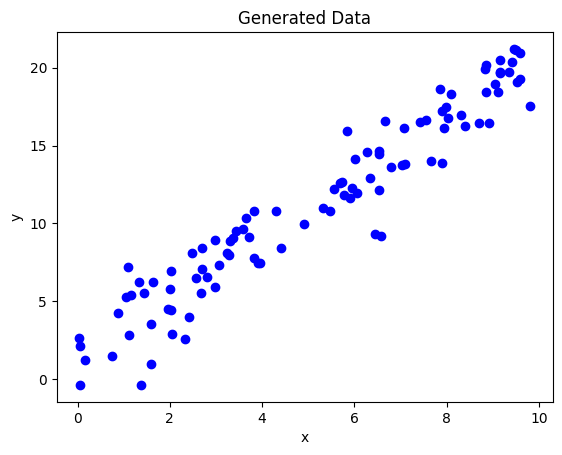

In [6]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# 랜덤 시드 설정 (재현 가능성을 위해)
torch.manual_seed(42)

# 데이터 생성 함수
def generate_data(num_samples=100):
    # y = 2x + 1 + noise
    x = torch.rand(num_samples, 1) * 10  # 0과 10 사이의 랜덤 값
    y = 2 * x + 1 + torch.randn(num_samples, 1) * 2 # 노이즈 추가
    return x, y

# 데이터 생성 및 시각화
x_train, y_train = generate_data()
plt.scatter(x_train.numpy(), y_train.numpy(), color='blue')
plt.title('Generated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# Loss function 정의 (MSE, Mean Squared Error)
def mse_loss(y_pred, y_true):
    return ((y_pred-y_true)**2).mean()
## torch.nn을 이용하여, 기본 내장되어있는 loss function을 사용할 수도 있습니다.
# mse_loss = torch.nn.MSELoss()

# 모델 Class 정의
class LinearRegressionModel:
    def __init__(self):
        #w0+w1*x
        self.w1 = torch.randn(1,1,requires_grad=True)
        self.w0 = torch.randn(1,requires_grad=True)

    def forward(self, input):
        return input * self.w1 + self.w0

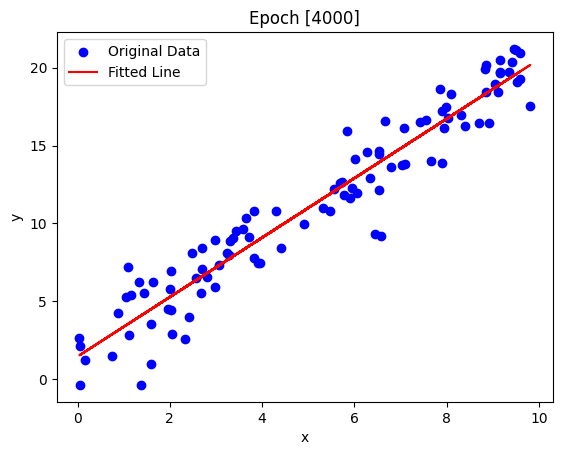

학습된 Weight: 1.9077, 학습된 Bias: 1.4615
입력 5.0에 대한 예측 값: 10.9997


In [9]:
# 모델 정의
model = LinearRegressionModel()

# 옵티마이저 정의
## Optimizer는 Optimization 단계에서 사용되는 알고리즘을 정의합니다.
## Adam, RMSProp, AdamW와 같은 다양한 Optimizer가 있습니다.
## SGD의 경우, 첫번째 매개변수로 최적화할 파라미터, 두번째로 learning rate를 인자로 줍니다.
optimizer = optim.SGD((model.w1,model.w0),lr=0.01)

num_epochs = 4000

### 모델 학습

for epoch in range(num_epochs):
    y_pred = model.forward(x_train)
    loss = mse_loss(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# 학습된 모델의 예측 값 시각화
with torch.no_grad():
    predicted = model.forward(x_train)
plt.scatter(x_train.numpy(), y_train.numpy(), color='blue', label='Original Data')
plt.plot(x_train.numpy(), predicted.numpy(), color='red', label='Fitted Line')
plt.title(f'Epoch [{num_epochs}]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 학습된 모델의 파라미터
print(f'학습된 Weight: {model.w1.item():.4f}, 학습된 Bias: {model.w0.item():.4f}')

# 새로운 입력 데이터로 예측
x_test = torch.tensor([[5.0]], dtype=torch.float32)
predicted = x_test * model.w1 + model.w0
print(f'입력 5.0에 대한 예측 값: {predicted.item():.4f}')
